In [84]:
import numpy as np
import scipy as sp

In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


<h1> <font face="Times"; size = 15; color = "red"> 1. Maximization </font></h1>

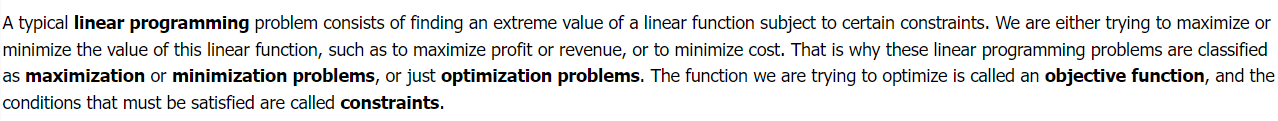

Maximization in linear programming refers to the objective of finding the maximum possible value of a linear objective function while satisfying a set of linear constraints. Linear programming (LP) is a mathematical optimization technique used in various fields, such as economics, engineering, finance, and logistics, to make optimal decisions in situations where resources are limited.

Here are the key components of a linear programming maximization problem:

1. Objective Function (Maximization): The objective function is a linear equation that represents the quantity you want to maximize. It typically has the form:

$$Z = c_1x_1 + c_2x_2 + \ldots + c_nx_n$$

2. Constraints: Constraints are linear inequalities or equations that represent limitations or restrictions on the decision variables. These constraints are typically represented in the form:

$$a_1x_1 + a_2x_2 + \ldots + a_nx_n \leq b$$

3. Non-Negativity Constraints: In most linear programming problems, it's assumed that decision variables cannot be negative:

$$x_1 \geq 0, \, x_2 \geq 0, \ldots, x_n \geq 0$$

# Example 1:

**Problem :**

Niki holds two part-time jobs, Job I and Job II. She never wants to work more than a total of 12 hours a week. She has determined that for every hour she works at Job I, she needs 2 hours of preparation time, and for every hour she works at Job II, she needs one hour of preparation time, and she cannot spend more than 16 hours for preparation.

If Nikki makes $40$ an hour at Job I, and $30$ an hour at Job II, how many hours should she work per week at each job to maximize her income?

$\begin{array}{ll} 
\textbf { Objective function (Maximize): } & \mathrm{I}=40 \mathrm{x}+30 \mathrm{y} \\ 
\textbf { Constraints: } & \mathrm{x}+\mathrm{y} \leq 12 \\ 
& 2 \mathrm{x}+\mathrm{y} \leq 16 \\ 
& \mathrm{x} \geq 0 ; \mathrm{y} \geq 0 
\end{array}$

In [72]:
x = np.linspace(-1,10,1000)

In [81]:
y1 = 12-x
y2 = 16-2*x
y3 = [12, 8, 0]

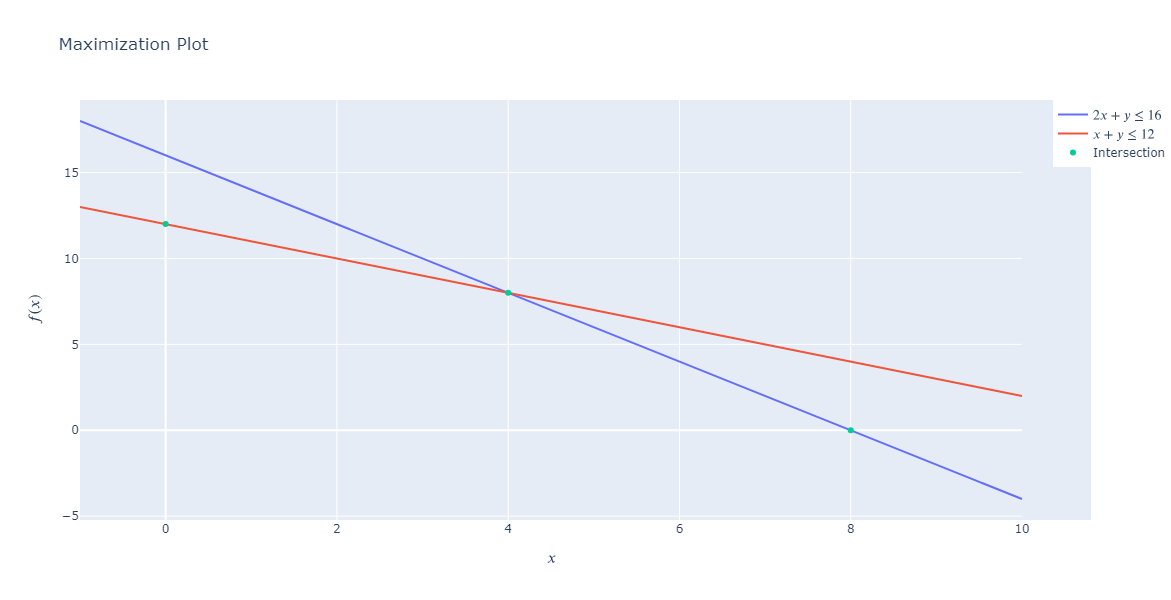

In [82]:
trace1 = go.Scatter(x = x, y = y2, name = "$2x+y \leq 16$")
trace2 = go.Scatter(x = x, y = y1, name = "$x+y \leq 12$")
trace3 = go.Scatter(x=[0,4,8], y=y3, mode='markers', name='Intersection')

fig = go.Figure(data=[trace1, trace2, trace3])
fig.update_layout(height=600, width=800, title_text="Maximization Plot")
fig.update_xaxes(title_text="<b>$x$</b>")
fig.update_yaxes(title_text="<b>$f(x)$</b>")
fig.show()

In [100]:
# Objective function coefficients (income per hour)
c = [-40, -30]

# Coefficients for the inequality constraints (hours and preparation time)
A = [
    [1, 1],
    [2, 1]
]

# Right-hand side of the inequality constraints
b = [12, 16]

# Variable bounds (x1, x2 >= 0 by default)

# Solve the linear programming problem
result = sp.optimize.linprog(c, A_ub=A, b_ub=b)

In [101]:
result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -400.0
              x: [ 4.000e+00  8.000e+00]
            nit: 2
          lower:  residual: [ 4.000e+00  8.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-2.000e+01 -1.000e+01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

# Example 2

**Problem 2:**

A factory manufactures two types of gadgets, regular and premium. Each gadget requires the use of two operations, assembly and finishing, and there are at most 12 hours available for each operation. A regular gadget requires 1 hour of assembly and 2 hours of finishing, while a premium gadget needs 2 hours of assembly and 1 hour of finishing. Due to other restrictions, the company can make at most 7 gadgets a day. If a profit of $20$ is realized for each regular gadget and $30$ for a premium gadget, how many of each should be manufactured to maximize profit?

$$\begin{array}{ll} 
\textbf { Maximize } & \mathrm{P}=20 \mathrm{x}+30 \mathrm{y} \\ 
\textbf { Subject to: } & \mathrm{x}+\mathrm{y} \leq 7 \\ 
& \mathrm{x}+2\mathrm{y} \leq 12 \\ 
& 2\mathrm{x} +\mathrm{y} \leq 12 \\ 
& \mathrm{x} \geq 0 ; \mathrm{y} \geq 0 
\end{array} \nonumber$$

In [104]:
c = [-20, -30]

A = [
    [1, 1],
    [1, 2],
    [2,1]
]

b = [7,12,12]

result = sp.optimize.linprog(c, A_ub=A, b_ub=b)

In [105]:
result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -190.0
              x: [ 2.000e+00  5.000e+00]
            nit: 3
          lower:  residual: [ 2.000e+00  5.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  3.000e+00]
                 marginals: [-1.000e+01 -1.000e+01 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

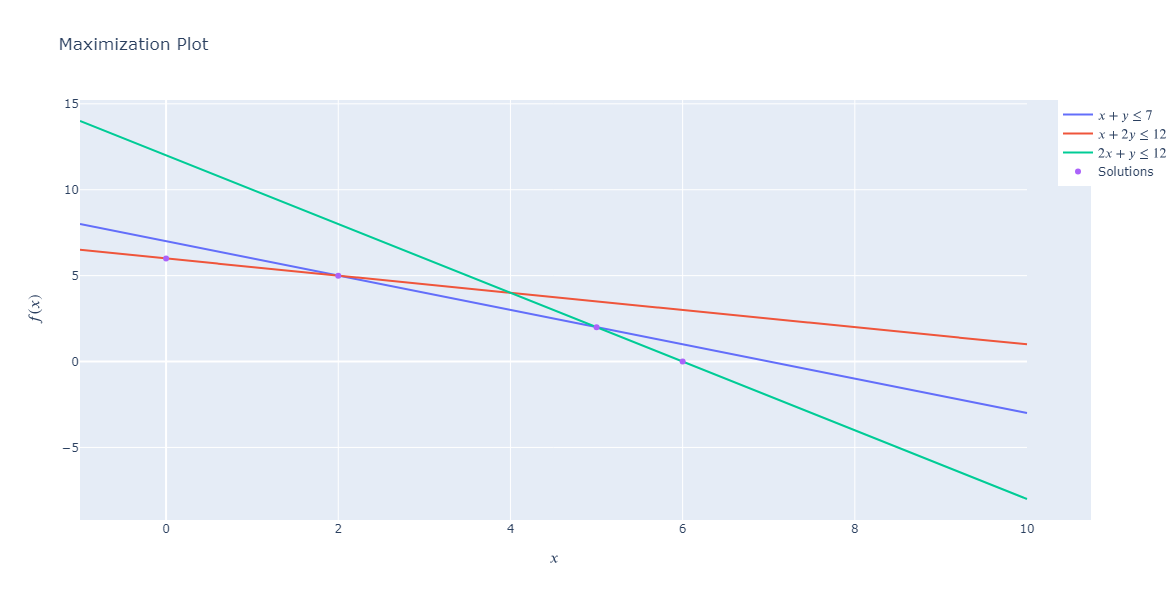

In [109]:
trace1 = go.Scatter(x = x, y = 7-x, name = "$x+y \leq 7$")
trace2 = go.Scatter(x = x, y = (12-x)/2, name = "$x+2y \leq 12$")
trace3 = go.Scatter(x=x, y=12-2*x, name='$2x+y \leq 12$')
trace4 = go.Scatter(x=[0,2,5,6], y=[6,5,2,0], mode = 'markers', name='Solutions')

fig = go.Figure(data=[trace1, trace2, trace3, trace4])
fig.update_layout(height=600, width=800, title_text="Maximization Plot")
fig.update_xaxes(title_text="<b>$x$</b>")
fig.update_yaxes(title_text="<b>$f(x)$</b>")
fig.show()

<h1> <font face="Times"; size = 15; color = "red"> 2. Minimization </font></h1>

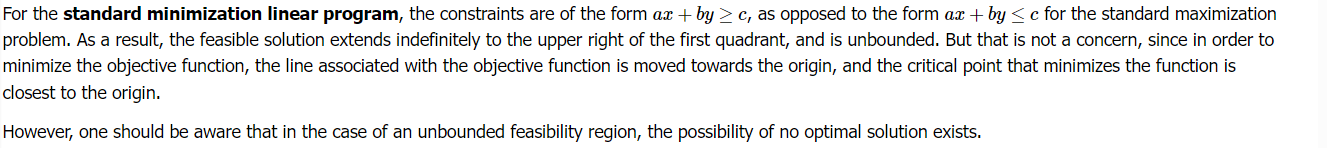

# Example 1:

**problem:**

At a university, Professor Symons wishes to employ two people, John and Mary, to grade papers for his classes. John is a graduate student and can grade 20 papers per hour; John earns $15$ per hour for grading papers. Mary is an post-doctoral associate and can grade 30 papers per hour; Mary earns $25$ per hour for grading papers. Each must be employed at least one hour a week to justify their employment.

If Prof. Symons has at least 110 papers to be graded each week, how many hours per week should he employ each person to minimize the cost?

$$\begin{array}{ll} 
\textbf { Minimize } & \mathrm{C}=15 \mathrm{x}+25 \mathrm{y} \\ 
\textbf { Subject to: } & \mathrm{x} \geq 1 \\ 
& \mathrm{y} \geq 1 \\ 
& 20 \mathrm{x}+30 \mathrm{y} \geq 110 \\ 
& \mathrm{x} \geq 0 ; \mathrm{y} \geq 0 
\end{array} \nonumber$$

In [114]:
c = [15, 25]  # Cost for John and Mary per hour

A = [
    [-20, -30],
]

b = [-110] 

x_bounds = [(1, None), (1, None)]

result = sp.optimize.linprog(c, A_ub=A, b_ub=b, bounds=x_bounds)

In [115]:
result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 85.0
              x: [ 4.000e+00  1.000e+00]
            nit: 0
          lower:  residual: [ 3.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  2.500e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00]
                 marginals: [-7.500e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

# Example 2:

**Problem:**

Professor Hamer is on a low cholesterol diet. During lunch at the college cafeteria, he always chooses between two meals, Pasta or Tofu. The table below lists the amount of protein, carbohydrates, and vitamins each meal provides along with the amount of cholesterol he is trying to minimize. Mr. Hamer needs at least 200 grams of protein, 960 grams of carbohydrates, and 40 grams of vitamins for lunch each month. Over this time period, how many days should he have the Pasta meal, and how many days the Tofu meal so that he gets the adequate amount of protein, carbohydrates, and vitamins and at the same time minimizes his cholesterol intake?

$$\begin{array}{ll} 
\textbf { Minimize } & \mathrm{C}=60 \mathrm{x}+50 \mathrm{y} \\ 
\textbf { Subject to: } & 8 \mathrm{x}+16 \mathrm{y} \geq 200 \\ 
& 60 \mathrm{x}+40 \mathrm{y} \geq 960 \\ 
& 2 \mathrm{x}+2 \mathrm{y} \geq 40 \\ 
& \mathrm{x} \geq 0 ; \mathrm{y} \geq 0 
\end{array} \nonumber$$

In [136]:
c = [60, 50]

A_eq = [
    [8, 16],    
    [60, 40],  
    [2, 2]    
]

b_eq = [200, 960, 40]

x_bounds = [(0, 30), (0, 30)]  

result = sp.optimize.linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method ="highs-ipm")

In [137]:
result

       message: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)
       success: False
        status: 2
           fun: None
             x: None
           nit: 0
         lower:  residual: None
                marginals: None
         upper:  residual: None
                marginals: None
         eqlin:  residual: None
                marginals: None
       ineqlin:  residual: None
                marginals: None